In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train,Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

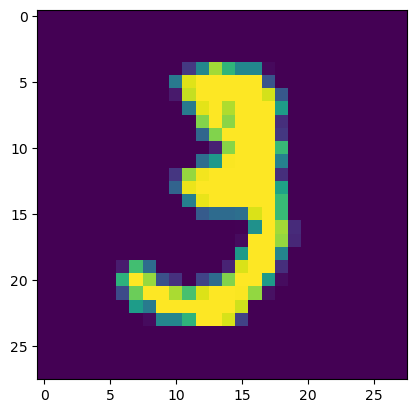

3


In [5]:
plt.imshow(X_train[10])
plt.show()
print(Y_train[10])

In [6]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.8590 - loss: 0.5055
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.9541 - loss: 0.1527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9673 - loss: 0.1100
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.9747 - loss: 0.0842
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.9801 - loss: 0.0679
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.9832 - loss: 0.0564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9867 - loss: 0.0471
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.9892 - loss: 0.0396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.9894 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9903 - loss: 0.0320


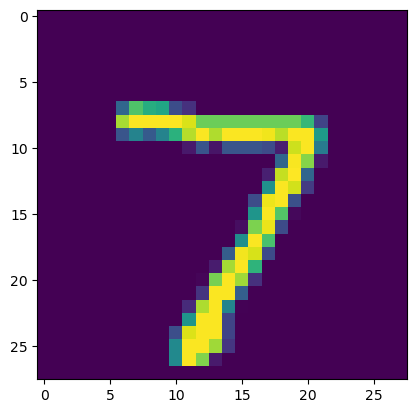

In [12]:
plt.imshow(X_test[0])
plt.show()

In [13]:
print(Y_test[0])

7


In [14]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


In [15]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 3, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 3, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [16]:
conf_matrix = confusion_matrix(Y_test,y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 951    1    3    2    5    1    1    2    1   13]
 [   0 1118    1    4    0    0    5    1    6    0]
 [   5    1 1005    2    3    1    2    6    6    1]
 [   0    0    6  988    1    6    0    2    4    3]
 [   0    0    6    1  963    1    2    2    1    6]
 [   3    0    0   11    1  861    2    1    8    5]
 [   7    2    4    1    5    6  927    1    4    1]
 [   1    0    8   18    2    1    0  990    1    7]
 [   3    2    7   12    6    4    4    2  926    8]
 [   1    1    1    7   11    4    0    5    3  976]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

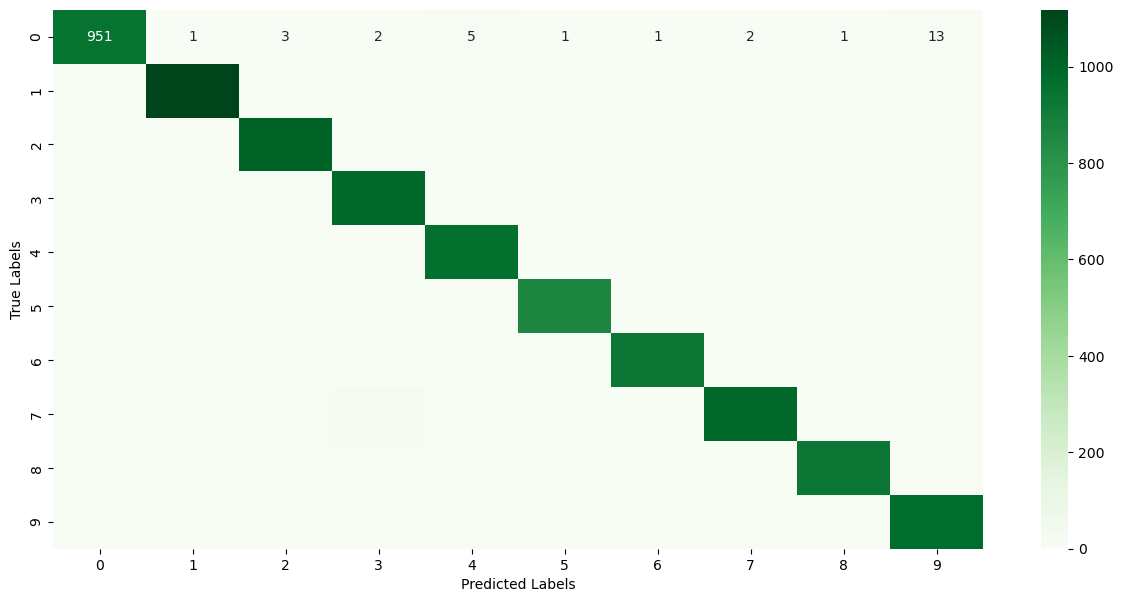

In [17]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap = 'Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("accuracy : ",accuracy)
print("loss : ",loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9663 - loss: 0.1297
accuracy :  0.9715999960899353
loss :  0.1141117662191391


In [19]:
img_path = './images.png'
img = cv2.imread(img_path)

In [20]:
type(img)

numpy.ndarray

In [21]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


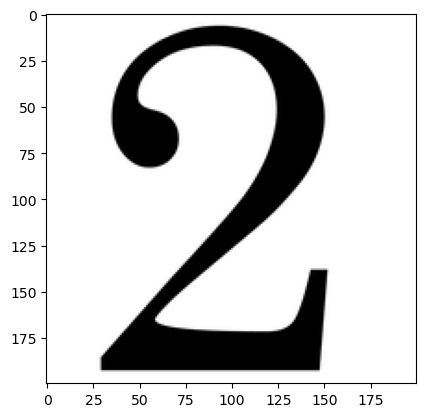

In [22]:
plt.imshow(img)
plt.show()

In [23]:
img.shape

(200, 200, 3)

In [24]:
gray_scale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [25]:
gray_scale.shape

(200, 200)

In [26]:
img_reshape = cv2.resize(gray_scale,(28,28))

In [27]:
img_reshape.shape

(28, 28)

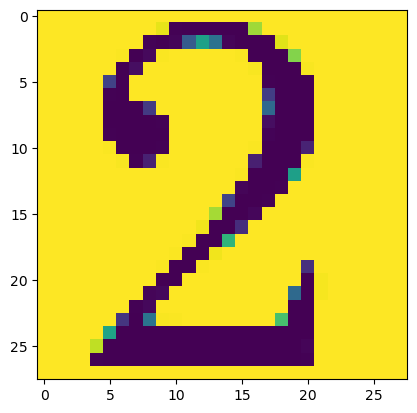

In [28]:
plt.imshow(img_reshape)
plt.show()

In [29]:
img_reshape = img_reshape/255

In [30]:
type(img_reshape)

numpy.ndarray

In [31]:
image_reshaped = np.reshape(img_reshape,(1,28,28))

In [32]:
image_pred = model.predict(image_reshaped)
print(image_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[5.7150286e-01 1.0623428e-02 1.0000000e+00 6.8364682e-07 3.3381383e-16
  9.9999696e-01 9.9999982e-01 1.0276349e-11 5.5459313e-18 9.7956977e-32]]


In [33]:
image_pred_label = np.argmax(image_pred)
print(image_pred_label)

2
